In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
dataset = pd.read_csv("cleaned_AllPeople.csv")

/Users/pranavkrishnan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.columns

Index(['Unnamed: 0', 'name_x', 'distinct_id', 'time', 'ae_session_length',
       'city', 'region', 'mp_country_code', 'locationSetting',
       'notificationSettings', 'FirstTimeUploaded', 'Signup With',
       'imageAdded', 'commentAdded', 'commentLength', 'ImageUploaded',
       'ae_total_app_session_length', 'name_y', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'country', 'US', 'Facebook',
       'Foodie', 'Google', 'Unknown'],
      dtype='object')

In [4]:
dataset[['distinct_id','ae_total_app_sessions']][dataset['distinct_id'] == 'DB387857-02A8-4BBF-B299-450EDB8C9560']['ae_total_app_sessions'].value_counts()

9.0    67
Name: ae_total_app_sessions, dtype: int64

In [5]:
id_to_app_open = {}

null_app_open_dates = dataset[dataset['ae_first_app_open_date'].isnull()]['distinct_id'].value_counts()


for _id in null_app_open_dates.index:
    event_order = dataset[dataset['distinct_id'] == _id].sort_values('time', ascending=True)
    try:
        first_app_open = event_order['name_x'].tolist().index('$ae_first_open')
        event_time = event_order['time'].tolist()[first_app_open]
        id_to_app_open[_id] = event_time
    except:
        try:
            first_app_open = event_order['name_x'].tolist().index('AppOpen')
            event_time = event_order['time'].tolist()[first_app_open]
            id_to_app_open[_id] = event_time
        except:
            id_to_app_open[_id] = event_order['time'].tolist()[0]

filled_in = []
for index in dataset.index:
    row = dataset.loc[index]
    try:
        isnan = np.isnan(row['ae_first_app_open_date'])
    except:
        isnan = False
    
    if isnan:
        filled_in += [id_to_app_open[row['distinct_id']]]
    else:
        filled_in += [row['ae_first_app_open_date']]

dataset['ae_first_app_open_date'] = filled_in
dataset['ae_first_app_open_date'] = pd.to_datetime(dataset['ae_first_app_open_date'], utc=True)
dataset['time'] = pd.to_datetime(dataset['ae_first_app_open_date'], utc=True)
dataset['last_seen'] = pd.to_datetime(dataset['last_seen'])
dataset['active_timespan'] = dataset['last_seen'] - dataset['ae_first_app_open_date']

In [6]:
average_total_app_sessions = np.mean(dataset.groupby('distinct_id').agg(np.mean)['ae_total_app_sessions'])

In [7]:
dataset['ae_total_app_sessions'] = dataset['ae_total_app_sessions'].fillna(average_total_app_sessions)

In [8]:
app_sessions_timespan = dataset[['distinct_id','ae_total_app_sessions', 'ae_first_app_open_date']]
app_sessions_timespan

,distinct_id,ae_total_app_sessions,ae_first_app_open_date
0,Gh@g.com_5858,14.310123,2019-08-19 21:43:18+00:00
1,A5C759A6-9FE5-4071-9D0A-4B91C61F63BD,3.000000,2019-06-12 17:44:46+00:00
2,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.000000,2019-11-21 11:58:17+00:00
3,C9434897-9F99-4D5F-B9D3-A3E8DAFC0B74,8.000000,2019-06-15 01:07:41+00:00
4,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.000000,2019-11-21 11:58:17+00:00
...,...,...,...
190366,DB387857-02A8-4BBF-B299-450EDB8C9560,9.000000,2019-08-19 17:01:09+00:00
190367,DB387857-02A8-4BBF-B299-450EDB8C9560,9.000000,2019-08-19 17:01:09+00:00
190368,DB387857-02A8-4BBF-B299-450EDB8C9560,9.000000,2019-08-19 17:01:09+00:00
190369,DB387857-02A8-4BBF-B299-450EDB8C9560,9.000000,2019-08-19 17:01:09+00:00


In [9]:
app_sessions_timespan[app_sessions_timespan['ae_first_app_open_date'].isnull()]['distinct_id'].value_counts()

Series([], Name: distinct_id, dtype: int64)

In [10]:
id_sessions = app_sessions_timespan.groupby('distinct_id').agg(np.mean)
id_sessions

,ae_total_app_sessions
distinct_id,
00000000-0000-0000-0000-000000000000,14.310123
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,11.000000
001210DC-54C8-43AD-B295-148F47818391,10.000000
0019C3B9-FA62-4AB4-A895-1390A1FA818C,14.310123
0025A8A4-2590-4ECA-8CE8-419D710AE46F,8.000000
...,...
wandaandreu@gmail.com_5053,14.310123
willwojt@gmail.com_6868,14.310123
wolphramite@gmail.com_291,14.310123


(array([7.199e+03, 4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([1.0000e+00, 3.6120e+02, 7.2140e+02, 1.0816e+03, 1.4418e+03,
        1.8020e+03, 2.1622e+03, 2.5224e+03, 2.8826e+03, 3.2428e+03,
        3.6030e+03]),
 <a list of 10 Patch objects>)

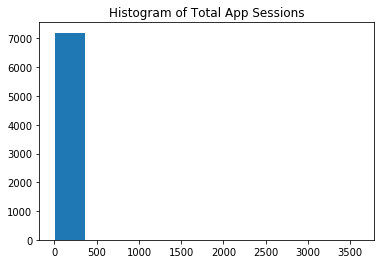

In [11]:
plt.title('Histogram of Total App Sessions')
plt.hist(id_sessions['ae_total_app_sessions'])

(array([33., 20., 22., 12.,  4.,  4.,  3.,  1.,  3.,  5.,  3.,  4.,  0.,
         1.,  3.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.,
        140., 150., 160., 170., 180., 190., 200., 210., 220., 230., 240.,
        250., 260., 270., 280., 290., 300., 310., 320., 330., 340., 350.,
        360., 370., 380., 390., 400., 410., 420., 430., 440., 450., 460.,
        470., 480., 490., 500.]),
 <a list of 47 Patch objects>)

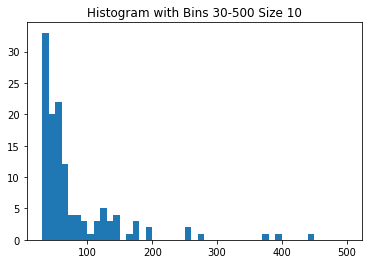

In [12]:
plt.title('Histogram with Bins 30-500 Size 10')
plt.hist(id_sessions['ae_total_app_sessions'], bins=np.linspace(30, 500, 48))

In [13]:
timespan = dataset[['distinct_id', 'active_timespan', 'ae_first_app_open_date']]

In [14]:
timespan['active_timespan'] = [elem.total_seconds() for elem in timespan['active_timespan']]
# id_timespan = timespan.groupby('active_timespan').agg(np.mean)


/Users/pranavkrishnan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
id_timespan = timespan.groupby('distinct_id').agg(np.mean)

In [16]:
id_timespan_sessions = id_timespan.merge(id_sessions, how='inner', left_index=True, right_index=True)
id_timespan_sessions['active_timespan'] = id_timespan_sessions['active_timespan'] / (60 * 60 * 24)

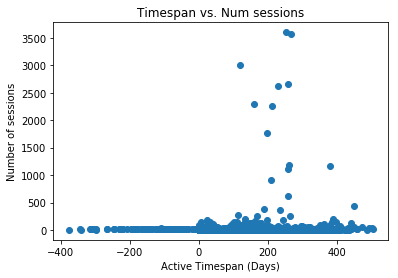

In [17]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Number of sessions')
plt.title('Timespan vs. Num sessions')
plt.scatter(id_timespan_sessions['active_timespan'], id_timespan_sessions['ae_total_app_sessions'])

In [18]:
id_timespan_sessions['sessions_per_day'] = id_timespan_sessions['ae_total_app_sessions'] / id_timespan_sessions['active_timespan']
id_timespan_sessions

,active_timespan,ae_total_app_sessions,sessions_per_day
distinct_id,,,
00000000-0000-0000-0000-000000000000,NaN,14.310123,NaN
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1.130949,11.000000,9.726344
001210DC-54C8-43AD-B295-148F47818391,7.158310,10.000000,1.396978
0019C3B9-FA62-4AB4-A895-1390A1FA818C,NaN,14.310123,NaN
0025A8A4-2590-4ECA-8CE8-419D710AE46F,113.687361,8.000000,0.070368
...,...,...,...
wandaandreu@gmail.com_5053,-19.645486,14.310123,-0.728418
willwojt@gmail.com_6868,36.216782,14.310123,0.395124
wolphramite@gmail.com_291,-245.893843,14.310123,-0.058196


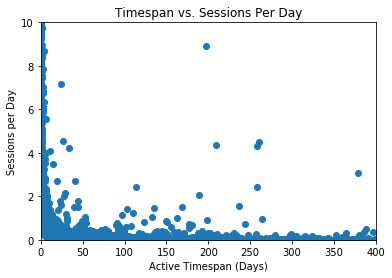

In [26]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Sessions per Day')
plt.ylim((0, 10))
plt.xlim((0, 400))
plt.title('Timespan vs. Sessions Per Day')
plt.scatter(id_timespan_sessions['active_timespan'], id_timespan_sessions['sessions_per_day'])

### For users with no recorded first_app_open_dates

### Making Sessions per Day, Timespan label

#### If spd < 0.14 (~ 1 session/week) and timespan < 150: churn
#### else: active

In [22]:
labels = []
for index in id_timespan_sessions.index:
    row = id_timespan_sessions.loc[index]
    if row['active_timespan'] > 0 and row['active_timespan'] < 150 and row['sessions_per_day'] < 0.14:
        labels += [1]
    else:
        labels += [0]

    

In [23]:
id_timespan_sessions['churned'] = labels

(array([6302.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         913.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

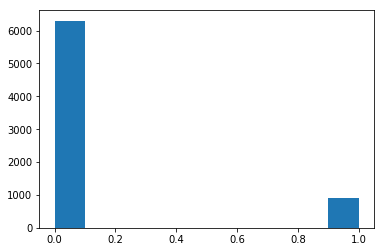

In [24]:
plt.hist(id_timespan_sessions['churned'])

In [ ]:
pd.to_datetime(dataset['time'])

np.isnan(dataset['ae_first_app_open_date'][0])